In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Load, process and visualize the data

In [3]:
z_ik = pd.read_csv('../data/trajectories/steady_state/steady_state_ik_y-up.csv')

In [4]:
z_ik.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,0.099408,-0.106652,0.104152,0.100146,-0.204320,0.104758,0.100296,-0.320682,0.090002
1,0.106960,-0.104326,0.099901,0.107172,-0.199658,0.105177,0.112519,-0.313322,0.095101
2,0.102378,-0.105111,0.102106,0.097044,-0.199044,0.098918,0.086223,-0.302799,0.057739
3,0.101192,-0.106624,0.104161,0.099396,-0.203264,0.111322,0.102750,-0.317726,0.114055
4,0.102844,-0.106269,0.102460,0.105243,-0.203288,0.100442,0.113583,-0.316760,0.088728


In [3]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Steady-state data

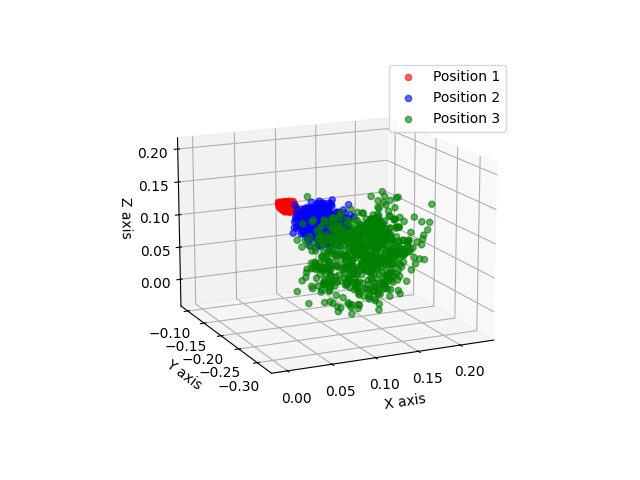

In [6]:
plt.close('all')

# Enable the ipympl backend for interactive plots
%matplotlib widget

z_dataframes = [z_ik]
position_colors = ['r', 'b', 'g']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for z_df in z_dataframes:
    x1, y1, z1 = z_df['x1'], z_df['y1'], z_df['z1']
    x2, y2, z2 = z_df['x2'], z_df['y2'], z_df['z2']
    x3, y3, z3 = z_df['x3'], z_df['y3'], z_df['z3']
    ax.scatter(x1, y1, z1, color=position_colors[0], label='Position 1', alpha=0.6)
    ax.scatter(x2, y2, z2, color=position_colors[1], label='Position 2', alpha=0.6)
    ax.scatter(x3, y3, z3, color=position_colors[2], label='Position 3', alpha=0.6)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Adjust the view so that y-axis is upwards
ax.view_init(elev=15, azim=245)
ax.legend()
set_axes_equal(ax)

# Dynamic data visualization

In [16]:
y_decay_300g = pd.read_csv('../data/trajectories/dynamic/observations_decay_300g.csv')

In [17]:
y_decay_300g.head()

,ID,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,0,0.100173,-0.107995,0.106393,0.101732,-0.206740,0.108745,0.100305,-0.326480,0.097787
1,0,0.100182,-0.107982,0.106378,0.101721,-0.206750,0.108749,0.100284,-0.326482,0.097777
2,0,0.100179,-0.107984,0.106385,0.101708,-0.206740,0.108748,0.100264,-0.326477,0.097776
3,0,0.100154,-0.107985,0.106391,0.101694,-0.206756,0.108759,0.100250,-0.326480,0.097775
4,0,0.100165,-0.107986,0.106391,0.101685,-0.206744,0.108757,0.100233,-0.326491,0.097776


In [18]:
# Group the data by ID (each are a separate trajectory)
y_decay_300g_trajs = y_decay_300g.groupby('ID')

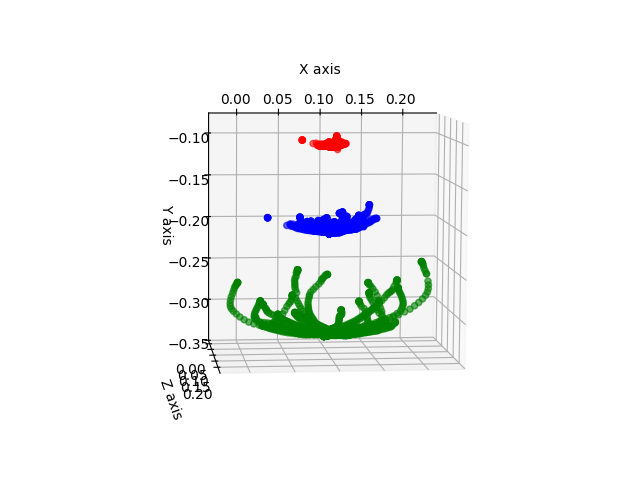

In [20]:
plt.close('all')

# Enable the ipympl backend for interactive plots
%matplotlib widget

position_colors = ['r', 'b', 'g']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for id, y_traj in y_decay_300g_trajs:
    x1, y1, z1 = y_traj['x1'], y_traj['y1'], y_traj['z1']
    x2, y2, z2 = y_traj['x2'], y_traj['y2'], y_traj['z2']
    x3, y3, z3 = y_traj['x3'], y_traj['y3'], y_traj['z3']
    ax.scatter(x1, y1, z1, color=position_colors[0], label='Position 1', alpha=0.6)
    ax.scatter(x2, y2, z2, color=position_colors[1], label='Position 2', alpha=0.6)
    ax.scatter(x3, y3, z3, color=position_colors[2], label='Position 3', alpha=0.6)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Adjust the view so that y-axis is upwards
ax.view_init(elev=100, azim=-45, roll=45)
# ax.legend()
set_axes_equal(ax)